# se2dr Sesmogram plotting [test]

seismogram plotting extracted from se2dr files. 

* It should allow to extract seismograms at a location wrt the fault and wrt to the mesh. 

* In case of the seismogram wrt the fault local reference system, accept a dictionary with the plot information
* By default, extract the seismogram mesh aligned



In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')

import os, sys, time
from glob import glob

sys.path.insert(0,"/home/nico/Tools/petsc-3.12.5/lib/petsc/bin/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from se2waveload import *
from Lib_GeneralFunctions import *

from Lib_ProfileProcessing import *
from GeneratePaperFigs import *


In [2]:
xx = np.linspace(-1.e4, 1.e4, 6001)

HorizontalZeroSDF = ZeroLevelSet(xx,Tiltfunc(xx, theta = 0), Tiltfunc_der(xx, theta = 0), "Horizontal SDF")
TiltedZeroSDF     = ZeroLevelSet(xx,Tiltfunc(xx, theta = 20*np.pi/180), Tiltfunc_der(xx, theta = 20*np.pi/180), "Tilted 20deg SDF")
SigmZeroSDF       = ZeroLevelSet(xx,func(xx),func_der(xx), "Sigmoid SDF")


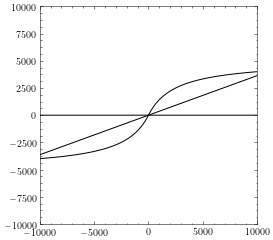

In [3]:
HorizontalZeroSDF.PlotZeroLevelSet()
TiltedZeroSDF.PlotZeroLevelSet()
SigmZeroSDF.PlotZeroLevelSet()
plt.xlim([-10000,10000])
plt.ylim([-10000,10000])
plt.gca().set_aspect('equal', adjustable='box')

# Extract the information for the profiles

## First the reference

In [4]:
start_time = time.time()
fname = "step-{timestep:04}_wavefield.pbin"
path = "/home/nico/Desktop/EGU2021/SigmoidPlotP1/"


i=2250
FieldFilename = os.path.join(path,fname.format(timestep=i))

MeshFilename = os.path.join(path, "default_mesh_coor.pbin")
se2_coor = se2wave_load_coordinates(MeshFilename)

TimeStepVal, LCoorX, LCoorY, LFieldX, LFieldY, LFieldvelX, LFieldvelY =  ExtractFields(FieldFilename, se2_coor)

SplineDispl = [RectBivariateSpline(LCoorX[:,0], LCoorY[0,:], LFieldX, kx=1, ky=1), 
                    RectBivariateSpline(LCoorX[:,0], LCoorY[0,:], LFieldY, kx=1, ky=1)]
SplineVel = [RectBivariateSpline(LCoorX[:,0], LCoorY[0,:], LFieldvelX, kx=1, ky=1), 
                    RectBivariateSpline(LCoorX[:,0], LCoorY[0,:], LFieldvelY, kx=1, ky=1)]

In [5]:
RandomLoc = [0,4000]


GetOnlyLocData(Loc=RandomLoc,SplineFunction=SplineDispl)

(0.14100327501617535, 0.1696740900082932)

In [6]:
FileList = glob(os.path.join(path,"step-{timestep}_wavefield.pbin".format(timestep="*")))
l = [i.replace(os.path.join(path,'step-'),'').replace('_wavefield.pbin','') for i in FileList]

In [7]:
l

['2250']